In [1]:

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras, unique
#%matplotlib inline
import numpy as np
import cv2
import joblib
from tensorflow.python.keras.models import load_model

import images in default and gray scale mode

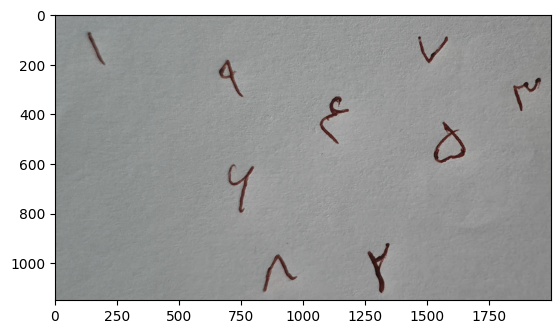

In [2]:
img = cv2.imread("HandWrite.jpg")
img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
img = img[550:1700, 600:2600]
plt.imshow(img)

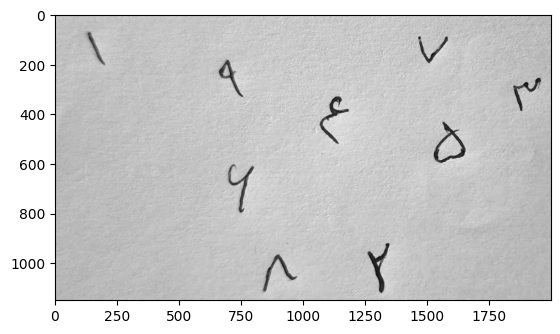

In [3]:

gray = cv2.imread('HandWrite.jpg', cv2.IMREAD_GRAYSCALE)
gray = cv2.rotate(gray, cv2.ROTATE_90_COUNTERCLOCKWISE)
gray = gray[550:1700, 600:2600]
#gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)

plt.imshow(gray, cmap='gray')
plt.show()

In [4]:
gray

array([[142, 132, 140, ..., 146, 137, 129],
       [148, 141, 140, ..., 143, 134, 127],
       [147, 141, 149, ..., 138, 131, 132],
       ...,
       [136, 142, 138, ..., 138, 136, 134],
       [139, 138, 130, ..., 137, 134, 135],
       [136, 140, 140, ..., 137, 136, 136]], dtype=uint8)

Convert image data to binary

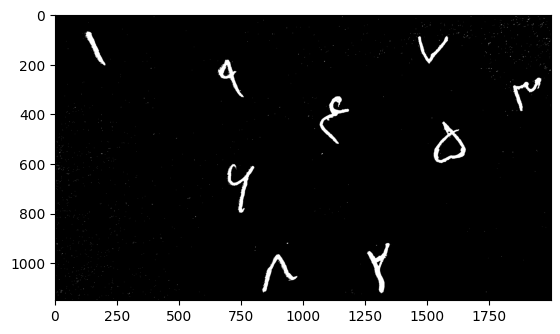

In [5]:
# openCV data handling
_, graycv = cv2.threshold(gray, 127.5, 255, cv2.THRESH_BINARY_INV)

plt.imshow(graycv, cmap="gray")
plt.show()

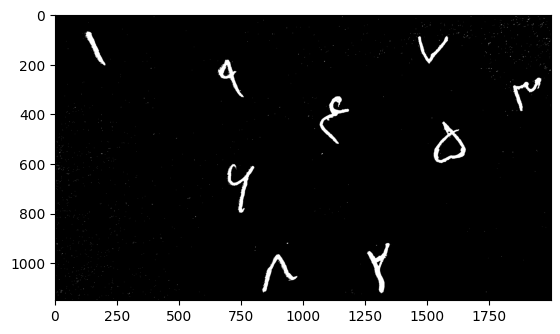

In [6]:
# numpy data handling
gray[gray<127.5]=0
gray[gray>127.5]=255
gray = 255-gray
plt.imshow(gray, cmap="gray")
plt.show()

Crop numbers with help of ConnectedComponents function

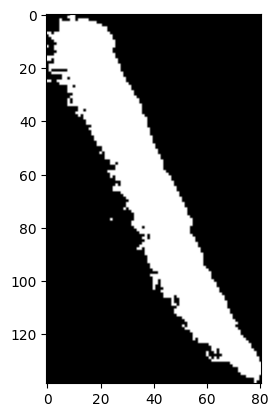

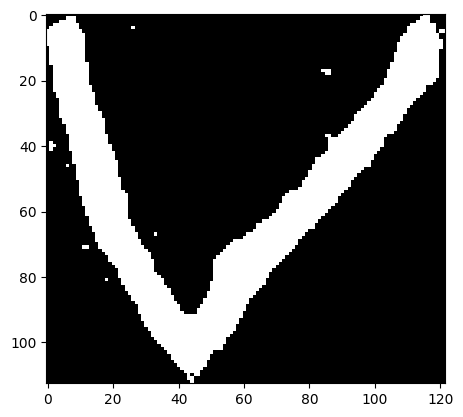

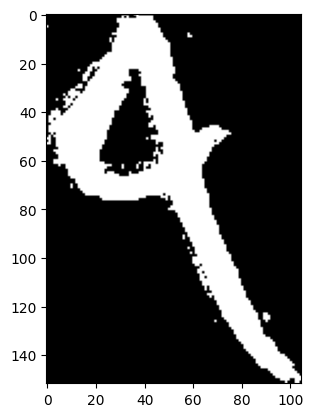

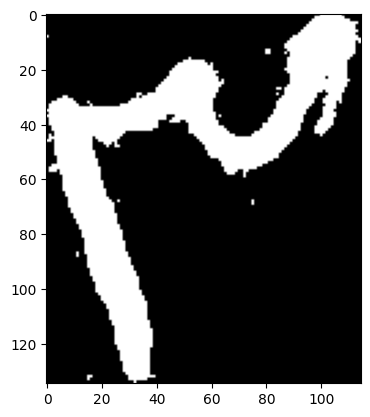

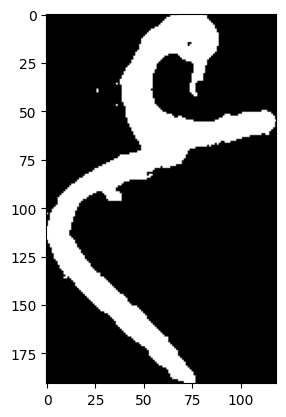

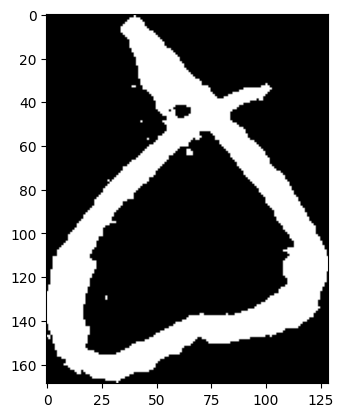

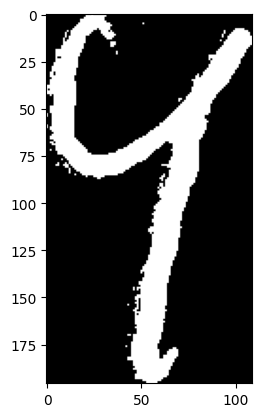

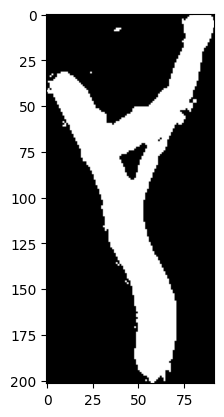

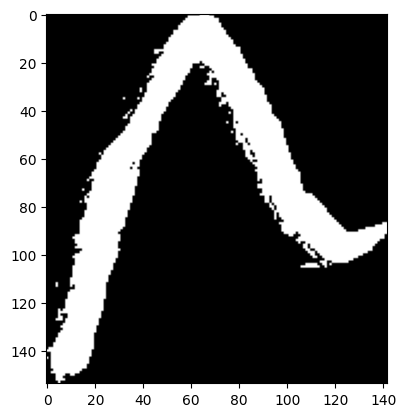

<Figure size 640x480 with 0 Axes>

In [7]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(gray, connectivity=8)

for i in range(1, num_labels):
    x, y, w, h = stats[i][:4]
    if w>80 and h>80:
        image = gray[y:y+h, x:x+w]
        plt.imshow(image, cmap="gray")
        plt.figure()
plt.show()

KNN Algorithm

In [14]:
net_knn= joblib.load("persian-digit-classification-with-knn.pkl")
net_knn

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


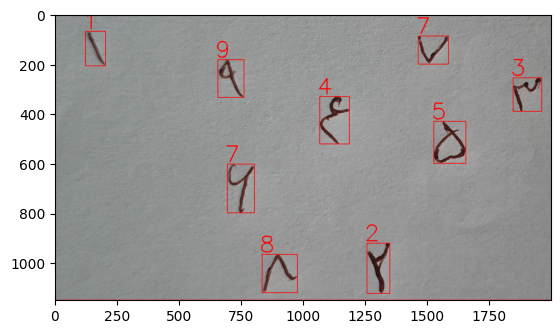

In [24]:
img = cv2.imread("HandWrite.jpg")
img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
img = img[550:1700, 600:2600]

for i in range(0, num_labels):
    x, y, w, h = stats[i][:4]
    if w>80 and h>80:
        image = gray[y:y+h, x:x+w]
        inp = cv2.resize(image, (5, 5))
        inp = inp.reshape(1, 25)
        r = net_knn.predict(inp)
        r = r[0]
        cv2.putText(img, text=str(r), org=(x-10, y-10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=3, color=(255,0,0), thickness=3)
        cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)

plt.imshow(img)
plt.show()

Nural Network Algorithm

In [25]:
from tensorflow.keras.models import load_model

net_nn= load_model("model.keras")
print(net_nn.input_shape)

(None, 25)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


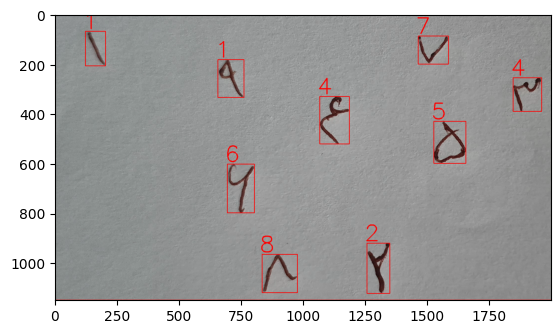

In [27]:
img = cv2.imread("HandWrite.jpg")
img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
img = img[550:1700, 600:2600]

for i in range(0, num_labels):
    x, y, w, h = stats[i][:4]
    if w>80 and h>80:
        image = gray[y:y+h, x:x+w]
        inp = cv2.resize(image, (5, 5))
        inp = inp.reshape(1, 25)
        r = net_nn.predict(inp)
        r = np.argmax(r)
        cv2.putText(img, text=str(r), org=(x-10, y-10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=3, color=(255,0,0), thickness=3)
        cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)

plt.imshow(img)
plt.show()

Convolutional Nural Netwok Model

In [11]:
net_cnn = load_model("cnnhoda.keras")

print(net_cnn.input_shape)

(None, 28, 28, 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


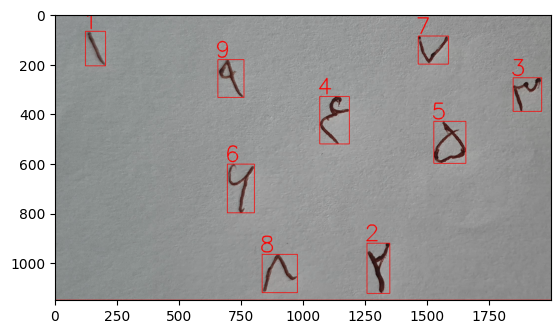

In [28]:
img = cv2.imread("HandWrite.jpg")
img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
img = img[550:1700, 600:2600]

for i in range(0, num_labels):
    x, y, w, h = stats[i][:4]
    if w>80 and h>80:
        image = gray[y:y+h, x:x+w]
        inp = cv2.resize(image, (28, 28))
        inp = inp.reshape(-1,28,28,1)
        r = net_cnn.predict(inp)
        r = np.argmax(r)
        cv2.putText(img, text=str(r), org=(x-10, y-10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=3, color=(255,0,0), thickness=3)
        cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)

plt.imshow(img)
plt.show()
